In [27]:
import numpy as np
dz=np.sqrt(0.5)
ang=np.array([0,120,240,60,180,300])*np.pi/180
#
ho=np.transpose([np.cos(ang),np.sin(ang),-dz+0*ang])
ho[:3,2]=+dz
ho[3:,2]=+dz
print(ho)

[[ 1.00000000e+00  0.00000000e+00  7.07106781e-01]
 [-5.00000000e-01  8.66025404e-01  7.07106781e-01]
 [-5.00000000e-01 -8.66025404e-01  7.07106781e-01]
 [ 5.00000000e-01  8.66025404e-01  7.07106781e-01]
 [-1.00000000e+00  1.22464680e-16  7.07106781e-01]
 [ 5.00000000e-01 -8.66025404e-01  7.07106781e-01]]


In [28]:
def lfm(f1,f2,t2,fs):
    return f1+(f2-f1)/t2*np.arange(0,t2,1/fs)

def sinfm(fc,fm,fa,t2,fs):
    return fc+fm*np.sin(2*np.pi*fa*np.arange(0, t2, 1/fs))

def tonal(fs,ax,fx):
    # generate tonal from frequency
    # e.g. generate 5 s LFM from 1 to 10 kHz and 96 kHz sampling
    #   xx=tonal(96000,1,lfm(1000,10000,5,96000))
    # e.g. generate 2 s sinusoidal fm: 3 oscillations/s from 1 to 3 kHz and 96 kHz sampling 
    #   xx=tonal(96000,1,sinfm(2000,1000,3,2,96000))
    phase=2*np.pi*np.cumsum(fx)/fs
    return ax*np.sin(phase)


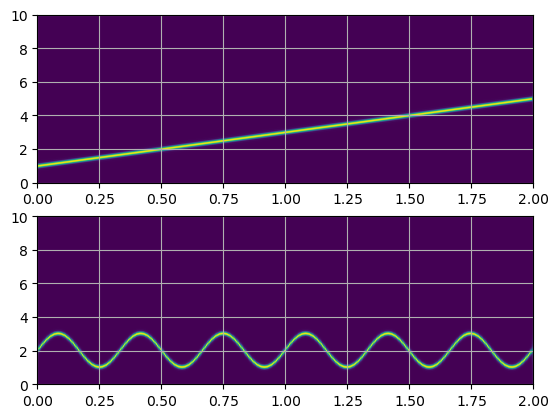

In [30]:
import matplotlib.pyplot as plt
import scipy.signal as signal
#
fs=96000
xx1=tonal(fs,1,lfm(1000,5000,5,fs))
xx2=tonal(fs,1,sinfm(2000,1000,3,2,fs))


nw=1024
nover=nw//2
nfft=nw*4
f1,t1,Q1 = signal.stft(xx1,fs=fs,nperseg=nw,noverlap=nover,nfft=nfft)#,
f2,t2,Q2 = signal.stft(xx2,fs=fs,nperseg=nw,noverlap=nover,nfft=nfft)#,

ext1=[t1[0],t1[-1],f1[0]/1000,f1[-1]/1000]
ext2=[t2[0],t2[-1],f2[0]/1000,f2[-1]/1000]

plt.subplot(211)
plt.imshow(np.abs(Q1), origin='lower', aspect='auto',extent=ext)
plt.ylim(0,10)
plt.grid(True)
plt.subplot(212)
plt.imshow(np.abs(Q2), origin='lower', aspect='auto',extent=ext)
plt.ylim(0,10)
plt.grid(True)
plt.show()


In [ ]:
u=np.array([[1,2,3,4,5,6],[7,8,9,10,11,12],[13,14,15,16,17,18]])
print(u)
i=[2,2,2]
print(u[range(len(i)),i])

[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]
 [13 14 15 16 17 18]]
[ 3  9 15]
